# Project: investigating the Stroop effect

The Stroop test is a well-known psychological test that demonstrates the effect of the inconscious automatic process in the brain when a person performs a task. To measure this effect, participants are asked to read a list of color words. Each word is printed with a specific color (font color). Two conditions are proposed:

- **congruent**: words are printed with the same font color as the word itself. For example, the word "green" is printed in green, the word "blue" is printed in blue, etc.

- **incongruent**: words are printed with a different color from the word itself. For example, the word "green" is printed in blue, the word "blue" is printed in green, etc. 

Un the Stroop test, participants are asked to read a list of color words and name the font color. They first name the congruent list, the the incongruent list. The effect of the automatic inconscious process of visual information is estimated by registering the time required by a person to name all the font colors in the list. This time is called **reaction time**.


### Test variables

The **independent variable** in this experiment is whether the color word and font color are the same or different. The levels of the independent variable are congruent (font color same as color names) and incongruent (font color and color word are different). 

The **dependent variable** is the reaction time required by a person to name all the font colors in the list. 


### Statistical test

The dataset consists of two samples (N=24) obtained from the same population (person selected for the test). The two samples are dependent, since the same person takes the test twice: read and name the list of congruent and incongruent words. Moreover, we cannot reject the hypothesis that the sample comes from a population which has a normal distribution (see Shapiro-Wilk test). Therefore, we will perform a **t-test on two dependet samples**. Usually, t-test is performed when the sample size is smaller than 30, whereas z-test is performed when the sample size is larger (or equal) than 30 [1]. The reason of performing a dependent t-test is that each participant performed both conditions not all samples are independent. Therefore the two samples are obtained from the same population of participants. 

The goal of the t-test is to estimate a parameter of the population (the mean in this case) from limited sample data. Consequently, null and alternative hypotheses concern with the population. 

We expect that a color word printed with an incongruent font color introduces difficulties in saying the font color. For this reason, a person requires more time to pronounce the color of an incongruent printed color than a congruent one. The test will be **directional one tail (negative)** with the following hypotheses:

**Null hypothesis (H0)**

Participants will not take any longer to name the font color of a list where the color name and font contradict one another than when they match. Therefore, the mean reaction time of the population that reads incongruent font color-color word lists will be smaller or equal (thus not larger) than the mean reaction time of the population that reads congruent font color-color word lists. The null hypothesis can be mathematically stated as:

$\text{H}_0 : \mu_{\text{congruent}} \ge \mu_{\text{incongruent}}$


**Alternative Hypothesis (H1)**

Participants will take longer to name the font color of a list where the color name and font color contradict one another than when they match. Therefore, the mean reaction time of the population that reads incongruent font color-color word lists will be greater than the mean reaction time of the population that reads congruent font color-color word lists. The alternative hypothesis can be mathematically stated as:

$\text{H}_1 : \mu_{\text{congruent}} < \mu_{\text{incongruent}}$


### Descriptive statistics

Let's first print the whole dataset, which consists of two samples of size N=24 and contains the reaction time of a person to pronounce the color words of the list.

In [1]:
# Import data (.csv) using Python's pandas
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

stroop_data = pd.read_csv("C:/Users/jacopo/Desktop/Deep Learning/Udacity/Projects/statistics/stroopdata.csv")
stroop_data

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Descriptive statistics of data
+-------------+---------------+---------+----------+----------+---------------+---------------+
|     Data    |      Mean     |  Median |    Q1    |    Q3    |    Variance   |      std      |
+-------------+---------------+---------+----------+----------+---------------+---------------+
|  Congruent  |   14.051125   | 14.3565 | 11.89525 | 16.20075 | 12.6690290707 | 3.55935795765 |
| Incongruent | 22.0159166667 | 21.0175 | 18.71675 | 24.0515  | 23.0117570362 | 4.79705712247 |
+-------------+---------------+---------+----------+----------+---------------+---------------+


(array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.]),
 <a list of 8 Text yticklabel objects>)

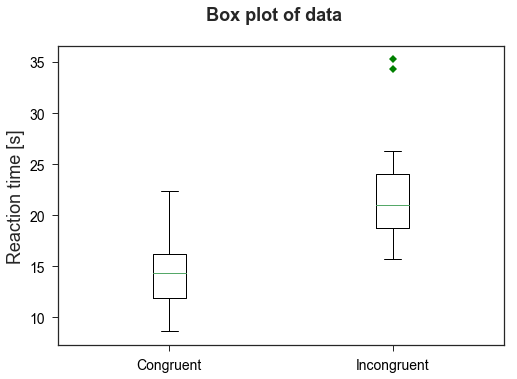

In [2]:
# Compute the mean
Mean = stroop_data.mean()

# Compute median values
Median = stroop_data.median()

# Compute quantile
Q1 = stroop_data.quantile(.25)
Q1_con = Q1['Congruent']
Q1_inc = Q1['Incongruent']
Q3 = stroop_data.quantile(.75)
Q3_con = Q3['Congruent']
Q3_inc = Q3['Incongruent']
IQR_con = Q3_con - Q1_con
IQR_inc = Q3_inc - Q1_inc

# Compute variance
Variance = stroop_data.var()

# Compute standard deviation s (with Bessel's correction)
std_s = stroop_data.std()  # Pandas applies directly Bessel's correction in std

# Print table of descriptive statistics using PrettyTable
from prettytable import PrettyTable
t = PrettyTable(['Data', 'Mean','Median','Q1','Q3','Variance','std'])
t.add_row(['Congruent', Mean[0], Median[0], Q1_con, Q3_con, Variance[0],std_s[0]])
t.add_row(['Incongruent', Mean[1], Median[1], Q1_inc, Q3_inc, Variance[1],std_s[1]])
print('Descriptive statistics of data')
print(t)

# Box plot
data = [stroop_data['Congruent'],stroop_data['Incongruent']]
fig = plt.figure()
plt.boxplot(data, 0, 'gD')
fig.suptitle('Box plot of data', fontsize=18, fontweight='bold')
plt.ylabel('Reaction time [s]', fontsize = 18)
plt.xticks((1, 2), ('Congruent', 'Incongruent'), color='k', size=14)
plt.yticks(color='k', size=14)


The table summarizes the descriptive statistics for each sample. The mean reaction time of congruent data is lower than the mean of incongruent data. The mean and median values of the congruent data are very close to each other, whereas the mean of the incongruent data is higher that the median (slightly positive skewed distribution). The standard deviation of the incongruent sample is larger than the one of the congruent data. Therefore, reaction times of incongruent words are more spread out.

The descriptive statistics of the two samples is summarized in the box plot. As showed also in the table, the reaction time of the congruent sample is lower than the mean reaction time of incongruent data (see green line inside the IQR boxes). Interestingly, the incongruent sample presents two outliers (green dots in the plot). We can identify these points using the outlier definition **outlier > Q3 + 1.5 * IQR**. The two outliers of the incongruent sample are **35.355 s** and **34.288 s**.

In [3]:
t = stroop_data['Incongruent']>(Q3_inc + 1.5 * IQR_inc)
idx = [i for i, x in enumerate(t) if x]
stroop_data['Incongruent'][idx]

14    35.255
19    34.288
Name: Incongruent, dtype: float64

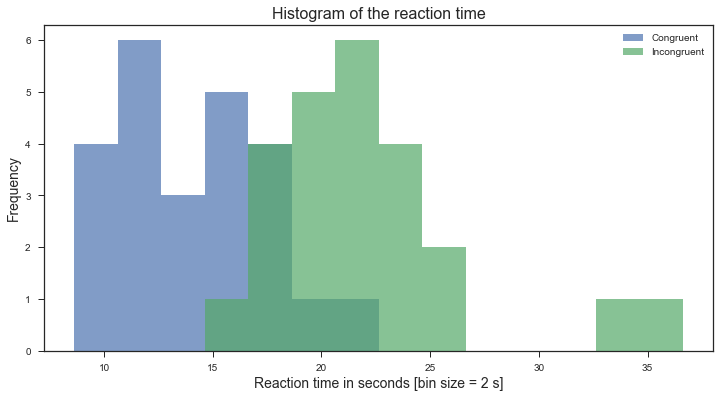

In [4]:
# Plot Histogram
a = [stroop_data['Congruent'], stroop_data['Incongruent']]
categories = ['Congruent','Incongruent']
time_min = stroop_data.min().min()
time_max = stroop_data.max().max()+2
bin_size = 2   # seconds

bin_values = np.arange(start=time_min, stop=time_max, step=bin_size)
ax = stroop_data.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.7, legend=True) 
ax.set_ylabel("Frequency",fontsize = 14)
ax.set_xlabel("Reaction time in seconds [bin size = 2 s]",fontsize = 14)
ax.set_title("Histogram of the reaction time",fontsize = 16)

The histogram of reaction time is obtained with a bin size if 2 seconds. The distributions do not overlap due to the difference in mean and median values. The two outliers of the incongruent sample are clearly visible on the right of the histogram.

We will now check if samples have normal distribution by running the Shapiro Wilk test with alpha = .001

In [5]:
# Check normality of distribution
from scipy import stats

print("Shapiro-Wilk test for normality of congruent data (W, p-value): ")
print(stats.shapiro(stroop_data['Congruent']))
print("Since the p-value is larger than alpha = .001, we cannot reject the hypothesis that the sample comes from a population which has a normal distribution.")
print("")
print("Shapiro-Wilk test for normality of incongruent data (W, p-value): ")
print(stats.shapiro(stroop_data['Incongruent']))
print("Since the p-value is larger than alpha = .001, we cannot reject the hypothesis that the sample comes from a population which has a normal distribution.")
print("")

Shapiro-Wilk test for normality of congruent data (W, p-value): 
(0.970922589302063, 0.689803421497345)
Since the p-value is larger than alpha = .001, we cannot reject the hypothesis that the sample comes from a population which has a normal distribution.

Shapiro-Wilk test for normality of incongruent data (W, p-value): 
(0.85394686460495, 0.0025900385808199644)
Since the p-value is larger than alpha = .001, we cannot reject the hypothesis that the sample comes from a population which has a normal distribution.



### Directional t-test

We now perform the dependet directional (negative) t-test with the following hypotheses on the population:

$\text{H}_0 : \mu_{\text{congruent}} \ge \mu_{\text{incongruent}}$

$\text{H}_1 : \mu_{\text{congruent}} < \mu_{\text{incongruent}}$
 
The size of each sample is N=24 and therefore the Student's t distribution has **23 degrees of freedom**. We select **alpha = .05**, whose corresponding critical t value is **t = - 1.714**. 

In [6]:
n = 24
dof = n - 1

# compute difference of reaction times
diff = []
for i in range(0,n):
    d = stroop_data['Congruent'][i] - stroop_data['Incongruent'][i]
    diff.append(d)
   
diff_mean = np.mean(diff)
print('Mean of the difference: %f' %diff_mean)

diff_2 = []
for i in range(0,n):
    d = diff[i] - diff_mean
    diff_2.append((d*d))

    
# compute Standard Error se
se = np.sqrt(np.sum(diff_2) / dof)
print('Standard error: %f' %se)

# Compute cohen's d
cohen_d = diff_mean / se

# Compute t-value 
t = (np.mean(stroop_data['Congruent']) - np.mean(stroop_data['Incongruent'])) /( se/ np.sqrt(n))

# Compute coefficient of determination r2
r2 = t*t / (t*t + dof)

print('t-value: %f' %t)
print('Cohens d: %f' %cohen_d)
print('Coeff of determination r^2: %f' %r2)

Mean of the difference: -7.964792
Standard error: 4.864827
t-value: -8.020707
Cohens d: -1.637220
Coeff of determination r^2: 0.736636


**Test result**: the t value obtained from the data is **t = -8.021 < -1.714**, larger than the critical t. The p-value computed from [socscistatistics.com](http://www.socscistatistics.com/Default.aspx) is **p < .05**. For these reasons, **we reject the null hypothesis that participants will not take any longer to name the font color of an incongruent list than a congruent one**.

In [7]:
# Compute estimated mean with 95% confidence
t95 = 2.069
print('The confidence interval at 95% of the mean reaction time for congruent font color-color word is: ')
print([Mean[0]-t95*std_s[0]/np.sqrt(n), Mean[0]+t95*std_s[0]/np.sqrt(n)])
print("")

print('The confidence interval at 95% of the mean reaction time for incongruent font color-color word is: ')
print([Mean[1]-t95*std_s[1]/np.sqrt(n), Mean[1]+t95*std_s[1]/np.sqrt(n)])

The confidence interval at 95% of the mean reaction time for congruent ink-color word is: 
[12.547891186495569, 15.554358813504439]

The confidence interval at 95% of the mean reaction time for incongruent ink-color word is: 
[19.989961829413204, 24.041871503920135]


We can expect that the mean reaction time of the population that reads incongruent font color-color word lists lies in 95% CI = (19.99, 24.04) s.